In [1]:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, Dependency, FeatureType

from eolearn.io.processing_api import SentinelHubInputTask
from eolearn.core import LoadFromDisk, SaveToDisk

from eolearn.mask import AddValidDataMaskTask

from eolearn.features import SimpleFilterTask, NormalizedDifferenceIndexTask

from eolearn.geometry import VectorToRaster
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import pandas as pd
import sentinelhub as sh
from sentinelhub import UtmZoneSplitter, BBox, CRS, DataCollection

In [2]:
path = r'D:\Downloads\toDIsk\LUCAS_2018_Copernicus'


In [3]:
gdf = gpd.read_file(os.path.join(path,"LUCAS_2018_Copernicus_polygons.shp"))
csv = pd.read_csv(os.path.join(path,"LUCAS_2018_Copernicus_attributes.csv")) 

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

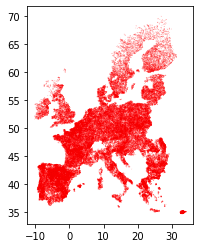

In [4]:
gdf.plot(edgecolor='r',facecolor='b')

In [29]:
portugal_csv = csv.loc[csv["NUTS0"] == "PT"]
gdf.POINT_ID = gdf.POINT_ID.astype(int)
portugal_gdf = portugal_csv.merge(gdf, on='POINT_ID', how='inner')
portugal_gdf.crs = gdf.crs
portugal_gdf = gpd.GeoDataFrame(portugal_gdf)


C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
from shapely.geometry import Polygon
poly = Polygon([(-8.9,40.20),(-8.9,41.18),(-8.70,40.18),(-8.70,40.20)])
poly1 = gpd.GeoSeries(poly)
df1 = gpd.GeoDataFrame({'geometry':poly1})
df1.crs = gdf.crs
#df1["geom_type"] = gdf.geom_type[1]
#df1["is_valid"] = gdf.is_valid[1]
#poly = gpd.GeoDataFrame(poly, crs = portugal_gdf.crs)

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

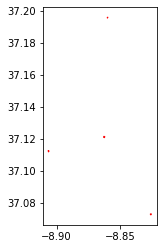

In [7]:
gpd.GeoDataFrame(portugal_gdf[:4]).plot(edgecolor='r')

In [8]:
gpd.overlay(portugal_gdf,df1, how='intersection')

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,POINT_ID,YEAR,NUTS0,NUTS1,NUTS2,NUTS3,TH_LAT,TH_LONG,OFFICE_PI,...,TH_GPS_DIST,FILE_PATH_GISCO_NORTH,FILE_PATH_GISCO_SOUTH,FILE_PATH_GISCO_EAST,FILE_PATH_GISCO_WEST,FILE_PATH_GISCO_POINT,CPRN_LC_SAME_LC1,LUCAS_CORE_INTERSECT,COPERNICUS_CLEANED,geometry
0,49760,27282102,2018,PT,PT1,PT16,PT16E,40.219562,-8.838408,0,...,2.604797,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.83856 40.22003, -8.83784 40.21969..."
1,53343,27302100,2018,PT,PT1,PT16,PT16E,40.206548,-8.810257,0,...,1.179481,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.81030 40.20664, -8.81010 40.20658..."
2,144871,27302106,2018,PT,PT1,PT16,PT16E,40.258972,-8.826112,0,...,3.168190,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.82621 40.25943, -8.82549 40.25909..."
3,436258,27322112,2018,PT,PT1,PT16,PT16E,40.315853,-8.819101,0,...,2.480821,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.81921 40.31631, -8.81849 40.31597..."
4,132863,27362108,2018,PT,PT1,PT16,PT16E,40.289812,-8.762726,0,...,2.023495,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.76286 40.29028, -8.76214 40.28994..."
5,113011,27362116,2018,PT,PT1,PT16,PT16E,40.359714,-8.783869,0,...,0.483155,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.78400 40.36016, -8.78328 40.35982..."
6,116664,27382100,2018,PT,PT1,PT16,PT16E,40.224337,-8.718773,0,...,2.037186,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.71884 40.22449, -8.71867 40.22434..."
7,113071,27382118,2018,PT,PT1,PT16,PT16E,40.381639,-8.766237,0,...,2.520618,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.76635 40.38210, -8.76598 40.38169..."
8,92498,27382124,2018,PT,PT1,PT16,PT16E,40.434060,-8.782131,0,...,1.922115,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.78225 40.43450, -8.78153 40.43416..."
9,34347,27402128,2018,PT,PT1,PT16,PT16E,40.473457,-8.769788,0,...,2.050898,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.e

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


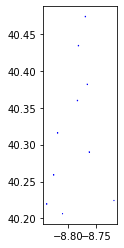

In [9]:
portugal_gdf[portugal_gdf.intersects(df1.geometry[0])].plot(edgecolor='b')
portugal_gdf = portugal_gdf.buffer(500)

In [34]:
bbox_splitter = sh.BBoxSplitter(portugal_gdf.geometry.to_list()[:10],sh.CRS.WGS84,10)

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
geometry = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter.get_bbox_list()]
bbox_portugal_gdf = gpd.GeoDataFrame(geometry=geometry,crs = portugal_gdf.crs)

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

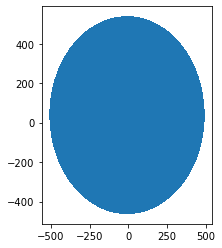

In [16]:
bbox_portugal_gdf.plot()

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-559.4867378476453, 543.9174087733613, -513.197550844893, 592.3155543609859)

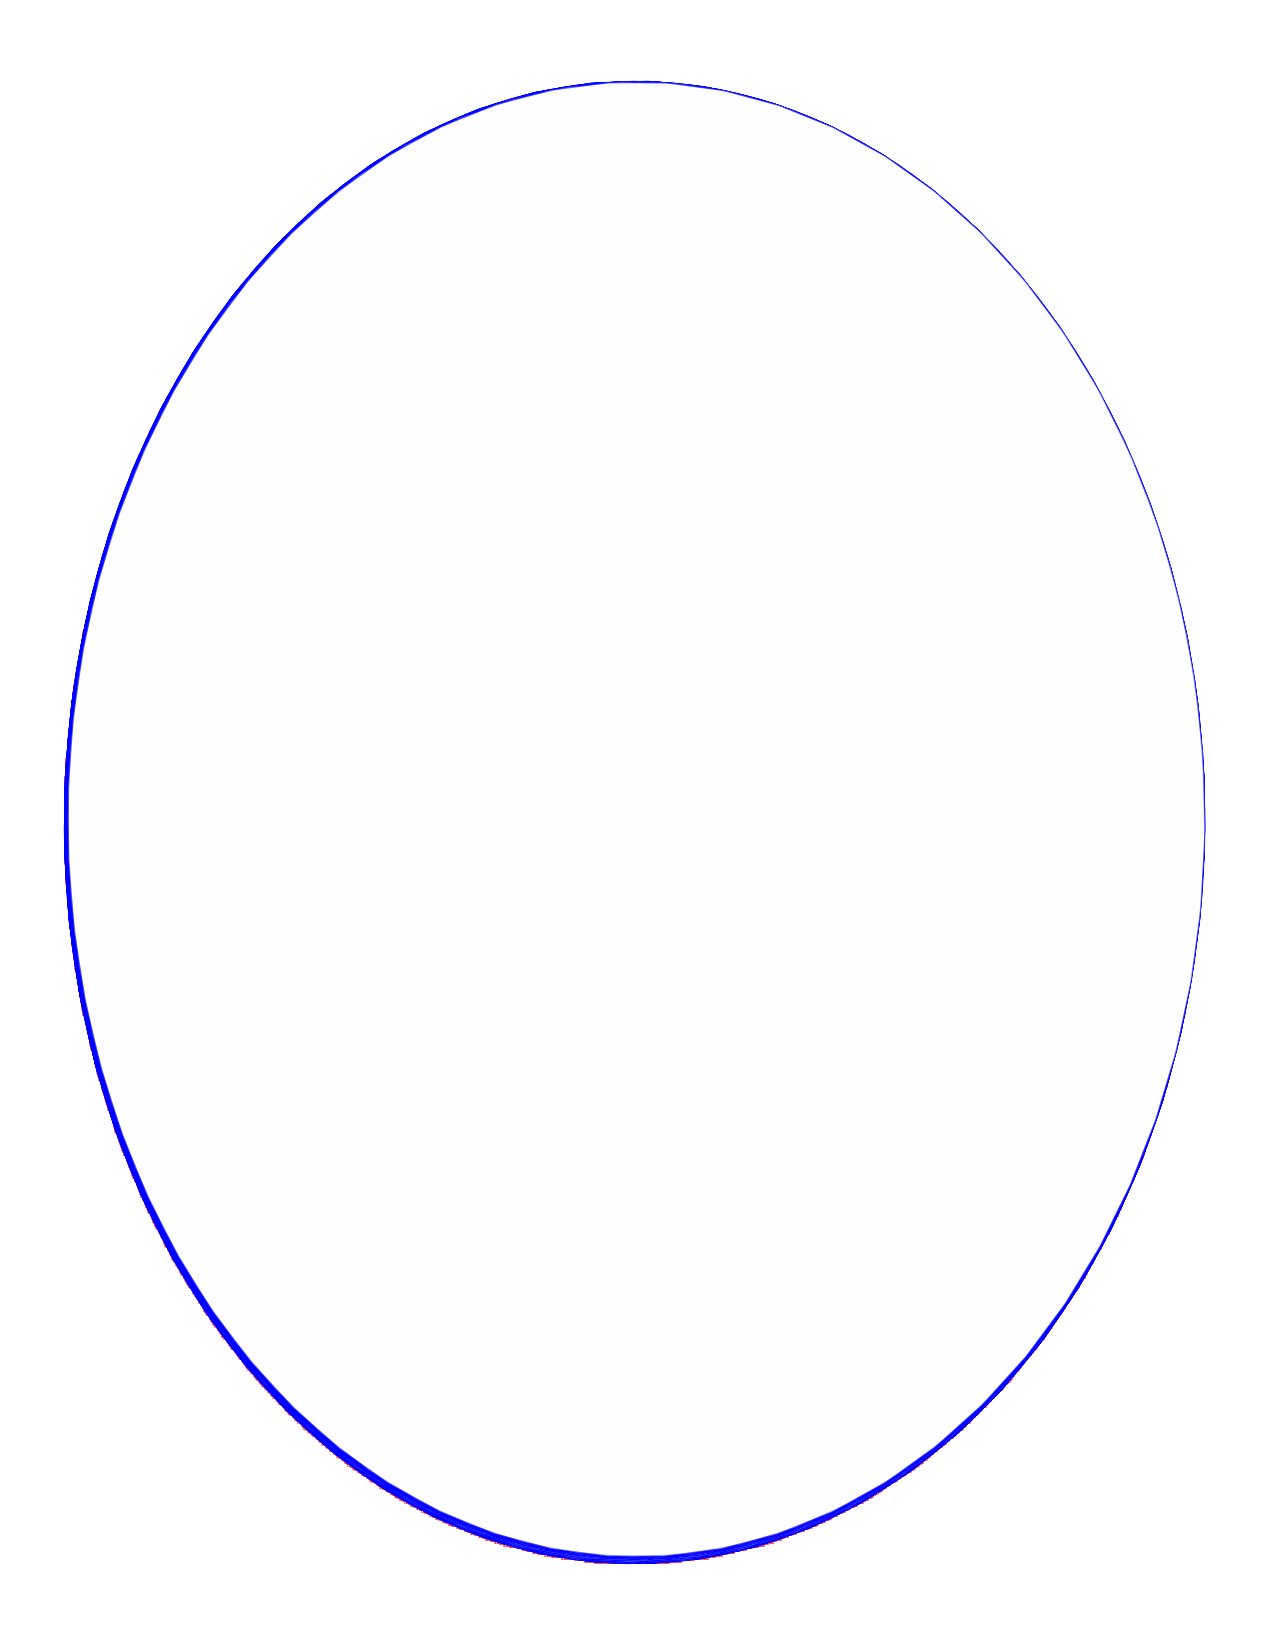

In [18]:
fig, ax = plt.subplots(figsize=(30, 30))
bbox_portugal_gdf.plot(ax=ax,facecolor='w',edgecolor='r',alpha=0.5)
portugal_gdf.plot(ax=ax, facecolor='w',edgecolor='b',alpha=0.5)
plt.axis('off')

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-559.4867378476453, 543.9174087733613, -513.197550844893, 592.3155543609859)

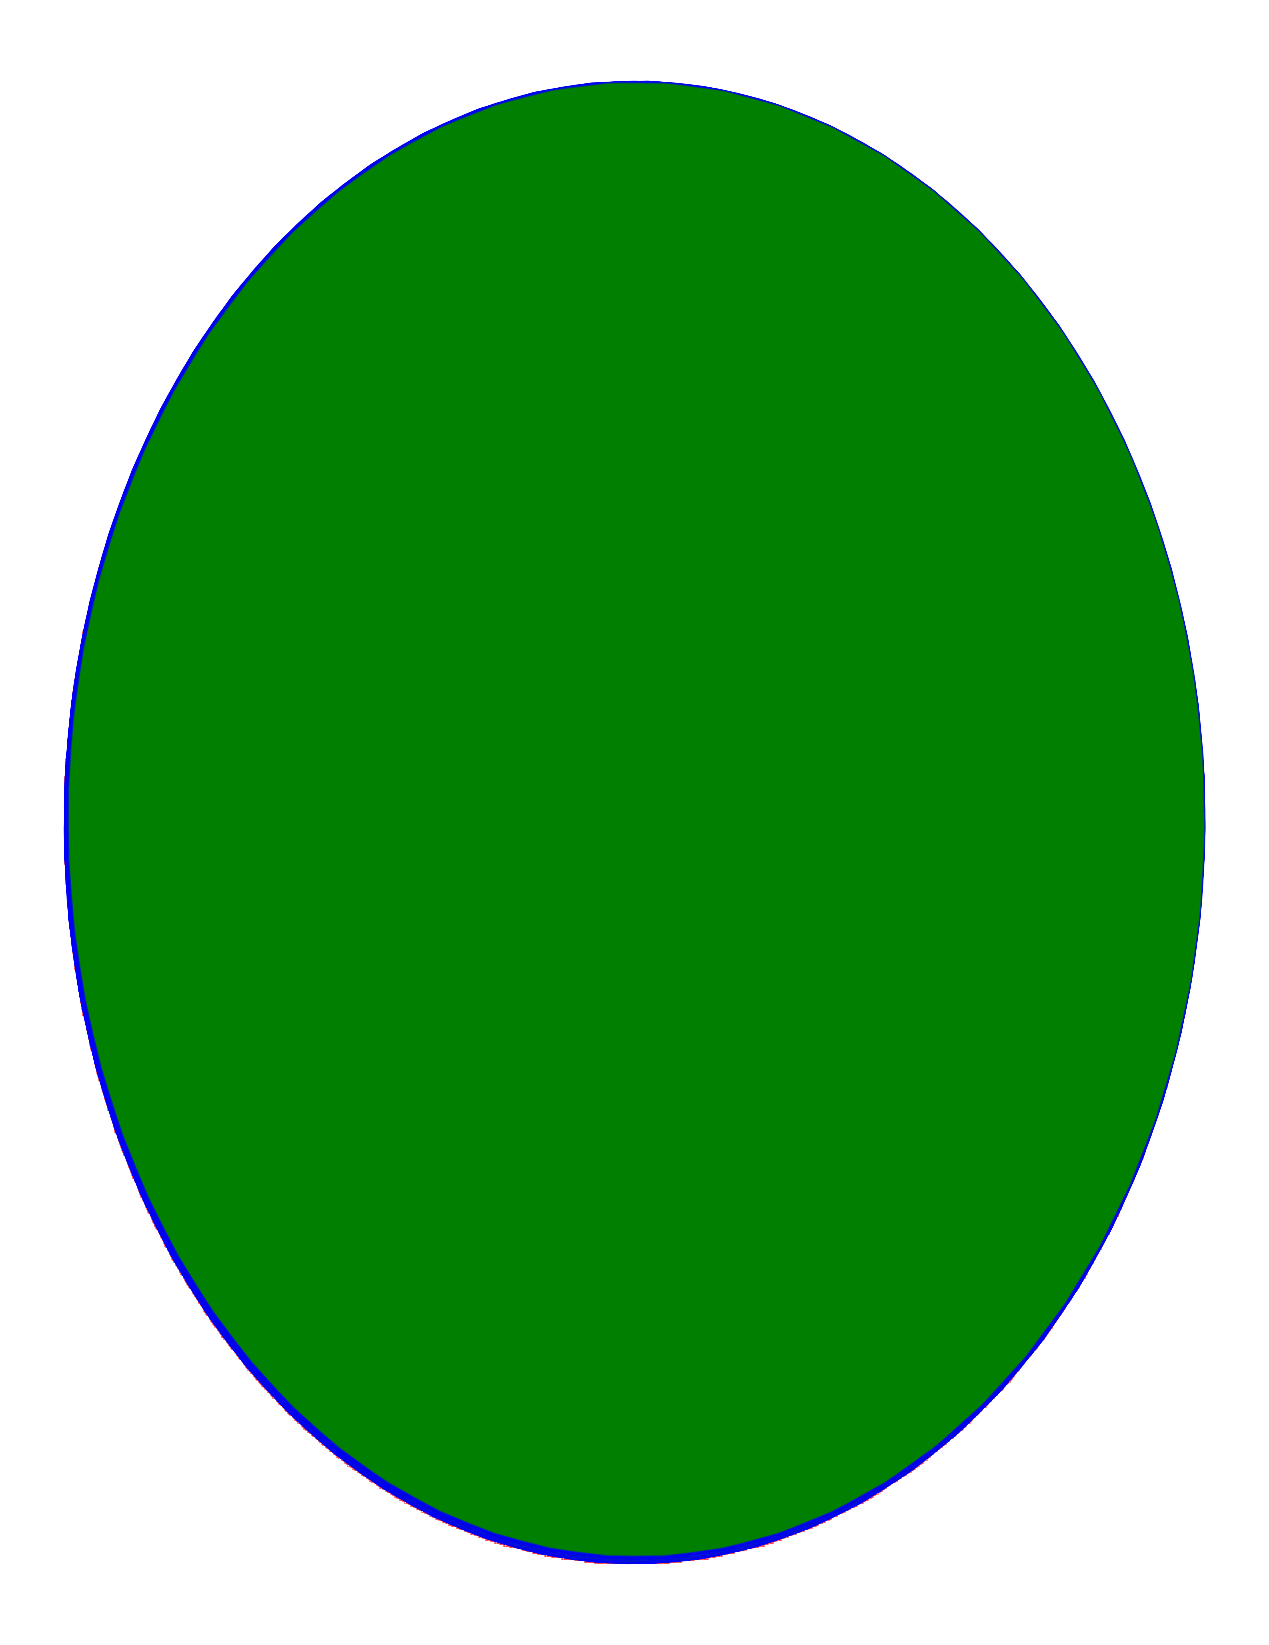

In [22]:
fig, ax = plt.subplots(figsize=(30, 30))
bbox_portugal_gdf.plot(ax=ax,facecolor='w',edgecolor='r',alpha=0.5)
portugal_gdf.plot(ax=ax, facecolor='g',edgecolor='b',alpha=0.5)
plt.axis('off')

In [23]:
portugal_gdf.plot(ax=ax, facecolor='g',edgecolor='b',alpha=0.5)

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [24]:
portugal_gdf

C:\Users\afons\.conda\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       POLYGON ((-401.538 -272.469, -430.984 -230.938...
1       POLYGON ((-228.998 -411.812, -272.079 -387.988...
2       POLYGON ((-229.321 -411.683, -271.495 -388.374...
3       POLYGON ((-462.157 -173.808, -480.295 -129.384...
4       POLYGON ((-4.971 -461.016, -53.032 -459.126, -...
                              ...                        
1743    POLYGON ((-224.775 -408.195, -267.912 -384.553...
1744    POLYGON ((-224.945 -408.113, -267.288 -384.932...
1745    POLYGON ((-224.614 -408.212, -266.997 -385.051...
1746    POLYGON ((-198.458 -419.962, -242.635 -398.980...
1747    POLYGON ((-225.211 -407.907, -267.549 -384.685...
Length: 1748, dtype: geometry